In [1]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB       #导入三种常用的朴素贝叶斯算法
from sklearn.metrics import accuracy_score                                 #分类准确率分数是指所有分类正确的百分比。
from sklearn.model_selection import train_test_split                        #返回切分的数据集train/test
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()
x = digits.data
y = digits.target

In [3]:
print(digits.images.shape)                                             #查看数据集的维度

(1797, 8, 8)


In [4]:
print(digits.images[0])
print(digits.images[0].shape)                                           #查看第一张图的属性

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
(8, 8)


## imshow()函数格式

matplotlib.pyplot.imshow(X, cmap=None)

X: 要绘制的图像或数组。

cmap: 颜色图谱（colormap), 默认绘制为RGB(A)颜色空间。

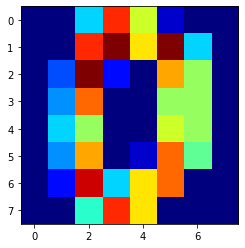

In [5]:
plt.imshow(digits.images[0],plt.cm.jet)                              #将第一张图绘制出来
plt.show()

## train_test_split()函数划分训练、测试数据
train_X,test_X,train_y,test_y = train_test_split(train_data,train_target,test_size=0.3,random_state=5)

参数解释：

train_data：待划分样本数据

train_target：待划分样本数据的结果（标签）

test_size：测试数据占样本数据的比例，若整数则样本数量

random_state：设置随机数种子，保证每次都是同一个随机数。若为0或不填，则每次得到数据都不一样

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=7)

# 伯努利朴素贝叶斯模型

In [7]:
model_b = BernoulliNB()
model_b = model_b.fit(x_train,y_train)
pred_b = model_b.predict(x_test)
accuracy_score_b = accuracy_score(y_test,pred_b)
print("Bernoulli朴素贝叶斯模型的准确率为： %.3lf"% accuracy_score_b)     

Bernoulli朴素贝叶斯模型的准确率为： 0.852


In [8]:
print(model_b.class_log_prior_)                   #各类标记的平滑先验概率对数值(其取值会受fit_prior和class_prior参数的影响)
print("\n")
print(model_b.feature_log_prob_)                  #指定类的各特征概率(条件概率)对数值，返回形状为(n_classes, n_features)数组

[-2.37430927 -2.29229612 -2.31620164 -2.26128589 -2.32429885 -2.23864341
 -2.24613408 -2.26894876 -2.41798434 -2.3002013 ]


[[-4.77912349 -3.6805112  -0.09699227 -0.00843887 -0.01694956 -0.23582871
  -3.16968558 -4.77912349 -4.77912349 -1.04145387 -0.01694956 -0.00843887
  -0.00843887 -0.00843887 -1.01792338 -4.77912349 -4.77912349 -0.18400364
  -0.00843887 -0.2147753  -0.66824963 -0.01694956 -0.23582871 -4.77912349
  -4.77912349 -0.06062462 -0.00843887 -0.86710049 -2.4765384  -0.01694956
  -0.01694956 -4.77912349 -4.77912349 -0.01694956 -0.00843887 -1.44691898
  -3.6805112  -0.00843887 -0.03419136 -4.77912349 -4.77912349 -0.07864313
  -0.00843887 -0.86710049 -0.9504821  -0.00843887 -0.10629466 -4.77912349
  -4.77912349 -0.99493386 -0.00843887 -0.00843887 -0.01694956 -0.00843887
  -0.53062825 -4.77912349 -4.77912349 -4.77912349 -0.08777561 -0.00843887
  -0.00843887 -0.09699227 -2.14006616 -4.77912349]
 [-4.8598124  -4.16666522 -0.70092932 -0.15933204 -0.05579136 -0.38247559
  -1.42582

In [9]:
print(model_b.class_count_)                  #class_count_属性：获取各类标记对应的训练样本数
print("\n")
print(model_b.feature_count_)                #获取各个类标记在各个特征上的均值

[117. 127. 124. 131. 123. 134. 133. 130. 112. 126.]


[[  0.   2. 107. 117. 116.  93.   4.   0.   0.  41. 116. 117. 117. 117.
   42.   0.   0.  98. 117.  95.  60. 116.  93.   0.   0. 111. 117.  49.
    9. 116. 116.   0.   0. 116. 117.  27.   2. 117. 114.   0.   0. 109.
  117.  49.  45. 117. 106.   0.   0.  43. 117. 117. 116. 117.  69.   0.
    0.   0. 108. 117. 117. 107.  13.   0.]
 [  0.   1.  63. 109. 121.  87.  30.   0.   0.   6.  79. 125. 123. 101.
   32.   0.   1.  31. 100. 127. 127.  97.  13.   0.   1.  53. 110. 124.
  126.  95.   9.   0.   0.  37.  96. 116. 127.  87.  10.   0.   0.  21.
   68. 108. 126.  87.  10.   0.   0.   5.  79. 115. 127.  94.  38.  15.
    0.   1.  63. 110. 127. 103.  46.  16.]
 [  0.  51. 119. 122. 123.  54.   4.   0.   1.  98. 120. 124. 124.  81.
   11.   0.   1.  78. 103.  88. 121.  92.  10.   0.   0.  28.  50.  85.
  122.  83.   6.   0.   0.   4.  39. 105. 121.  48.   3.   0.   0.  18.
   84. 121. 105.  51.  32.   2.   1.  43. 120. 124. 124. 124. 118.  

# 高斯朴素贝叶斯model

In [10]:
model_g = GaussianNB()
model_g.fit(x_train,y_train)
pred_g =model_g.predict(x_test)
accuracy_score_g = accuracy_score(y_test,pred_g)
print('GaussianNB朴素贝叶斯模型的准确率为: %.4lf' % accuracy_score_g)

GaussianNB朴素贝叶斯模型的准确率为: 0.8204


In [11]:
print(model_g.class_prior_)                  #获取各个类标记对应的先验概率
print(model_g.class_count_)                  #获取各类标记对应的训练样本数

[0.09307876 0.10103421 0.09864757 0.10421639 0.09785203 0.10660302
 0.10580748 0.10342084 0.08910103 0.10023866]
[117. 127. 124. 131. 123. 134. 133. 130. 112. 126.]


In [12]:
print(model_g.theta_)                        #获取各个类标记在各个特征上的均值
print("\n")
print(model_g.sigma_)                        #获取各个类标记在各个特征上的方差  

[[0.00000000e+00 3.41880342e-02 4.26495726e+00 1.31282051e+01
  1.13333333e+01 3.21367521e+00 3.41880342e-02 0.00000000e+00
  0.00000000e+00 9.82905983e-01 1.26153846e+01 1.32136752e+01
  1.12564103e+01 1.16068376e+01 1.12820513e+00 0.00000000e+00
  0.00000000e+00 3.72649573e+00 1.41794872e+01 5.25641026e+00
  1.90598291e+00 1.19059829e+01 3.66666667e+00 0.00000000e+00
  0.00000000e+00 5.17948718e+00 1.26837607e+01 2.23931624e+00
  1.70940171e-01 8.70940171e+00 6.52991453e+00 0.00000000e+00
  0.00000000e+00 5.89743590e+00 1.15982906e+01 1.00854701e+00
  3.41880342e-02 8.65811966e+00 7.12820513e+00 0.00000000e+00
  0.00000000e+00 3.57264957e+00 1.32905983e+01 1.55555556e+00
  1.33333333e+00 1.13162393e+01 5.58119658e+00 0.00000000e+00
  0.00000000e+00 7.17948718e-01 1.32735043e+01 9.79487179e+00
  1.02649573e+01 1.33504274e+01 2.28205128e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 4.15384615e+00 1.37179487e+01
  1.34358974e+01 5.21367521e+00 2.39316239e-01 0.00000000e+00]
 [0.000

# 多项式朴素贝叶斯模型

In [13]:
model_m = MultinomialNB(fit_prior=True)
model_m = model_m.fit(x_train,y_train)
pred_m = model_m.predict(x_test)
accuracy_score_m = accuracy_score(y_test,pred_m)
print("MultinomialNB朴素贝叶斯模型的准确率为： %.4lf" % accuracy_score_m)

MultinomialNB朴素贝叶斯模型的准确率为： 0.8852


In [14]:
print(model_m.class_log_prior_)             #各类标记的平滑先验概率对数值
print("\n")
print(model_m.feature_log_prob_)            #指定类的各特征概率(条件概率)对数值

[-2.37430927 -2.29229612 -2.31620164 -2.26128589 -2.32429885 -2.23864341
 -2.24613408 -2.26894876 -2.41798434 -2.3002013 ]


[[-10.52085999  -8.91142208  -4.30625189  -3.18327224  -3.33018395
   -4.5886148   -8.91142208 -10.52085999 -10.52085999  -5.7672698
   -3.22309171  -3.17678714  -3.33698927  -3.30635557  -5.63051086
  -10.52085999 -10.52085999  -4.44092679  -3.10628711  -4.09761302
   -5.10921394  -3.2809274   -4.45707478 -10.52085999 -10.52085999
   -4.1123312   -3.21768994  -4.94870596  -7.47633755  -3.59330208
   -3.88098415 -10.52085999 -10.52085999  -3.98272016  -3.30709168
   -5.74173649  -8.91142208  -3.5992018   -3.79342826 -10.52085999
  -10.52085999  -4.48298907  -3.17098628  -5.31137384  -5.46461418
   -3.33169225  -4.03775264 -10.52085999 -10.52085999  -6.07820873
   -3.17227246  -3.47595487  -3.42911787  -3.16649766  -4.92987301
  -10.52085999 -10.52085999 -10.52085999  -4.33259586  -3.13935809
   -3.16012008  -4.10576303  -7.15356416 -10.52085999]
 [-10.58640761  -

In [15]:
print(model_m.class_count_)            #获取各类标记对应的样本数
print("\n")
print(model_m.feature_count_)          #获取各类标记在各特征上的均值

[117. 127. 124. 131. 123. 134. 133. 130. 112. 126.]


[[0.000e+00 4.000e+00 4.990e+02 1.536e+03 1.326e+03 3.760e+02 4.000e+00
  0.000e+00 0.000e+00 1.150e+02 1.476e+03 1.546e+03 1.317e+03 1.358e+03
  1.320e+02 0.000e+00 0.000e+00 4.360e+02 1.659e+03 6.150e+02 2.230e+02
  1.393e+03 4.290e+02 0.000e+00 0.000e+00 6.060e+02 1.484e+03 2.620e+02
  2.000e+01 1.019e+03 7.640e+02 0.000e+00 0.000e+00 6.900e+02 1.357e+03
  1.180e+02 4.000e+00 1.013e+03 8.340e+02 0.000e+00 0.000e+00 4.180e+02
  1.555e+03 1.820e+02 1.560e+02 1.324e+03 6.530e+02 0.000e+00 0.000e+00
  8.400e+01 1.553e+03 1.146e+03 1.201e+03 1.562e+03 2.670e+02 0.000e+00
  0.000e+00 0.000e+00 4.860e+02 1.605e+03 1.572e+03 6.100e+02 2.800e+01
  0.000e+00]
 [0.000e+00 1.000e+00 2.880e+02 1.191e+03 1.360e+03 7.220e+02 9.600e+01
  0.000e+00 0.000e+00 1.100e+01 5.010e+02 1.640e+03 1.798e+03 1.048e+03
  1.250e+02 0.000e+00 2.000e+00 1.260e+02 8.930e+02 1.904e+03 1.824e+03
  8.910e+02 5.700e+01 0.000e+00 1.000e+00 2.930e+02 1.169e+03 1.840e+

In [16]:
print(model_m.coef_)                                  #将多项式朴素贝叶斯解释feature_log_prob_映射成线性模型，其值和feature_log_prob相同
print("\n")
print(model_m.intercept_)                             #将多项式朴素贝叶斯解释的class_log_prior_映射为线性模型，其值和class_log_prior相同

[[-10.52085999  -8.91142208  -4.30625189  -3.18327224  -3.33018395
   -4.5886148   -8.91142208 -10.52085999 -10.52085999  -5.7672698
   -3.22309171  -3.17678714  -3.33698927  -3.30635557  -5.63051086
  -10.52085999 -10.52085999  -4.44092679  -3.10628711  -4.09761302
   -5.10921394  -3.2809274   -4.45707478 -10.52085999 -10.52085999
   -4.1123312   -3.21768994  -4.94870596  -7.47633755  -3.59330208
   -3.88098415 -10.52085999 -10.52085999  -3.98272016  -3.30709168
   -5.74173649  -8.91142208  -3.5992018   -3.79342826 -10.52085999
  -10.52085999  -4.48298907  -3.17098628  -5.31137384  -5.46461418
   -3.33169225  -4.03775264 -10.52085999 -10.52085999  -6.07820873
   -3.17227246  -3.47595487  -3.42911787  -3.16649766  -4.92987301
  -10.52085999 -10.52085999 -10.52085999  -4.33259586  -3.13935809
   -3.16012008  -4.10576303  -7.15356416 -10.52085999]
 [-10.58640761  -9.89326043  -4.91998093  -3.50301977  -3.37043261
   -4.00299839  -6.01169664 -10.58640761 -10.58640761  -8.10150096
   -4.36

本例中模型预测准确率 多项式朴素贝叶斯（0.8852）>伯努利朴素贝叶斯（0.852）>高斯朴素贝叶斯（0.8204）

## 总结：
scikit-learn根据不同场景提供了三种常用的朴素贝叶斯算法：

（1）如果样本特征的分布大部分是连续值，使用GaussianNB会比较好；

（2）如果样本特征的分大部分是多元离散值，使用MultinomialNB比较合适。例如文本分类单词统计，以出现的次数作为特征值；

（3）如果样本特征是二元离散值或者很稀疏的多元离散值，应该使用BernoulliNB。